In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
import scipy.stats as stats

In [31]:
df=pd.read_pickle('log_data')

In [32]:
#df=df.drop(df.columns[[4]], axis=1)

In [33]:
df.head(10)

,GDP_1,labor,land,rails,airports,pdebt
Country,,,,,,
Albania,24.307063,13.996164,10.266323,6.517671,1.386294,23.967385
Algeria,27.168986,16.285304,14.683342,8.287277,5.056246,25.814190
Angola,25.989060,16.342039,14.036011,7.955776,5.170484,25.562882
Armenia,24.067540,14.225631,10.300349,6.659294,2.397895,23.442052
Australia,27.852563,16.373513,15.862070,10.414603,6.173786,26.975493
Austria,26.812311,15.264780,11.337035,8.665613,3.951244,26.574054
Azerbaijan,25.871922,15.448274,11.369055,7.987626,3.610918,25.268616
Belarus,25.912884,15.292788,12.243368,8.617581,4.174387,25.239539
Belgium,26.994632,15.487735,10.326400,8.186464,3.713572,27.026131


In [34]:
# Create an empty model
lr = LinearRegression()

# Choose the predictor variables, here all but the first which is the response variable
# This model is analogous to the Y ~ X1 + X2 + X3 + X4 + X5 + X6 model
X = df.iloc[:, 1:]

# Choose the response variable(s)
y = df.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)
# Fit the model to the full dataset
lr.fit(X_train, y_train)

# Print out the R^2 for the model against the full dataset
lr.score(X,y)

0.9466244128487824

In [35]:
X = sm.add_constant(X)
luther_model = sm.OLS(y_test, X_test, data=df)

results = luther_model.fit()

# summarize our model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  GDP_1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.173e+04
Date:                Fri, 25 Jan 2019   Prob (F-statistic):           5.95e-31
Time:                        12:16:39   Log-Likelihood:                -14.447
No. Observations:                  23   AIC:                             38.89
Df Residuals:                      18   BIC:                             44.57
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
labor          0.1628      0.140      1.164      0.260      -0.131       0.457
land           0.2019      0.108      1.874      0.077      -0.024       0.428
rails         -0.1595      0.210     -0.760      0.457      -0.600       0.281
airports       0.0438      0.158      0.278      0.784      -0.287       0.375
pdebt          0.8597      0.089      9.676      0.000       0.673       1.046
==============================================================================
Omnibus:                        0.062   Durbin-Watson:                   1.576
Prob(Omnibus):                  0.969   Jarque-Bera (JB):                0.091
Skew:                           0.067   Prob(JB):                        0.956
Kurtosis:                       2.722   Cond. No.                         77.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
X = sm.add_constant(X)
luther_model = sm.OLS(y, X, data=df)

results = luther_model.fit()

# summarize our model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  GDP_1   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     385.5
Date:                Fri, 25 Jan 2019   Prob (F-statistic):           1.05e-66
Time:                        12:16:39   Log-Likelihood:                -58.676
No. Observations:                 113   AIC:                             129.4
Df Residuals:                     107   BIC:                             145.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6441      0.753      7.494      0.000       4.151       7.137
labor          0.2031      0.055      3.715      0.000       0.095       0.311
land          -0.0934      0.045     -2.097      0.038      -0.182      -0.005
rails          0.0998      0.040      2.489      0.014       0.020       0.179
airports       0.1671      0.046      3.608      0.000       0.075       0.259
pdebt          0.6632      0.045     14.753      0.000       0.574       0.752
==============================================================================
Omnibus:                        1.785   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.410   Jarque-Bera (JB):                1.330
Skew:                           0.081   Prob(JB):                        0.514
Kurtosis:                       3.506   Cond. No.                         643.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

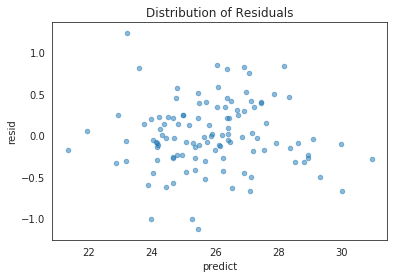

In [58]:
df['predict']=results.predict(X)
df['resid']= y-df.predict
with sns.axes_style('white'):
    plot = df.plot(kind='scatter', x='predict', y='resid', alpha=0.5)
    plt.title("Distribution of Residuals")


In [59]:
fig = plot.get_figure()
fig.savefig("Dist_Res.png")


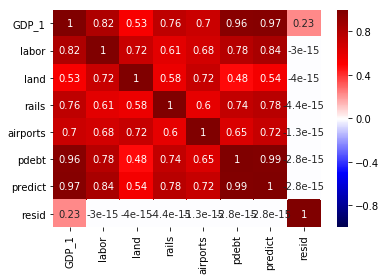

In [42]:
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

Text(0, 0.5, 'y')

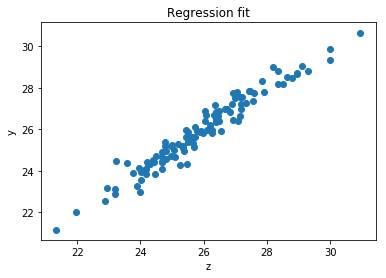

In [46]:
z=results.predict(X)
plt.scatter(z,y)

plt.title("Regression fit")
plt.xlabel("z")
plt.ylabel("y")

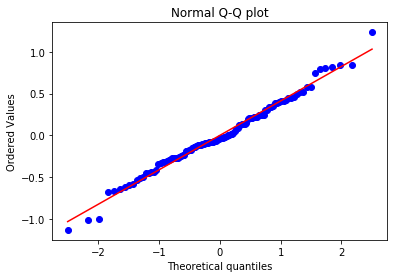

In [56]:
res=y-df.predict
stats.probplot(res, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.savefig('Q-Q.png')